# Machine learning project 4

The goal here is to construct and train a model to predict the diversity_index of the species table. The diversity index is defined for each study's site meaning we need to keep one line per site. 

In first to the species table we add 3 new features create with excel with the specabund table to get the total number of fish per site, the number of different fish observed per site and calculate the margalef's index allowing to measure the fish diversity at a site.Then we merged the species and trait table together. For that by excel its with the specabund table we transform the table into 3 columns to get the site, the fish species and the number of each fish observed at the site (list data sets respectively site, Species, and value). This allow to link the species and trait table through the site and Species common features. The value allow us to keep only the row where the fish is observed at the site (value different than 0). At the end we reduce the dataset to back at one line per sites. 

For the models here we choose to test 3 differents type:
- Ridge regression : a linear model with penalization 
- Random forest regression : ensemble model using multiple decision trees to obtain the better features classification and predict the target value
- XGBoost regressor : this model combine weak learner with penalization and strong predictor to predict the target value

To evaluate the model performance we choose to look at the :
- R squarred (R²) which represent the pourcentage of observation variance explain by the model
- Mean Absolute Error (MAE) which measure the absolute discrepancies between and dataset's actual values and projected values
- Mean Squared Error (MSE) it measures the square root of the average discrepancies between a dataset's actual values and projected values. It highlight how well the predictive model work.
- Root Mean Squared Error (RMSE) it measure the accuracy of fit of a predictive model

In [1]:
#Library needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')

#this line will allow to set an option in pandas for it display all the columns of the dataset 
# what ever the number
pd.set_option('display.max_columns', None)

In [2]:
#upload csv file

#The Species.csv file
species = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=',', index_col=0)

#The Species_diversity.csv file
index= pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/Species_diversity.csv", sep=';')

#The SpecSiteList.csv file
list = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/SpecSiteList.csv", sep=";")

#The traits_combined_2023.xlsx file
trait=pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx")

Merge of the dataset to get the indexes in the species tables

In [3]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site            3999 non-null   object 
 1   Total           3999 non-null   float64
 2   Nb_dif_Sp       3999 non-null   int64  
 3   Margalef_Index  3999 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 125.1+ KB


In [4]:
species

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,Marquesas,FKNMS,NaN,NaN,NaN,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Coral Reef and Hardbottom,Spur and Groove,91742,1057990,-6.0,1048.528198,7731.371094,0,733,Open,37045,43641,8378,1.675894,0,70,126,74.0,74.0,Marquesas,FKNMS,NaN,NaN,NaN,1.150137e+07,21234.26563,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Coral Reef and Hardbottom,Pavement,94607,1058988,-7.0,1441.421387,6641.421387,0,733,Open,37170,44078,8548,1.676708,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Coral Reef and Hardbottom,Pavement,96139,1060134,-7.0,1341.421387,5641.421387,0,733,Open,37198,44369,8603,1.696853,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Coral Reef and Hardbottom,Pavement,98167,1061388,-14.0,900.000000,4324.264160,16,733,Open,37685,45235,8752,1.697870,0,70,126,126.0,126.0,Lower Keys,FKNMS,NaN,NaN,NaN,9.313051e+06,14697.00195,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2065262_3278U,impact,2018,September,25.770183,-80.087650,17.953469,SEFCRI,1.000000,0.834130,24.261774,453.504700,7.363275,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,76608,972777,-27.0,200.000000,3752.691162,935,3615,Open,924228,3882796,128369,54.825044,0,53,17,1137.0,1137.0,NaN,NaN,NaN,NaN,CoralECA,3.750273e+06,353222.28130,23.764472,-0.105,-0.128,-0.260,-0.185,318050.4,12.064380,6958,0.709,2018,APRD,SEFCRI,1.000000,0.834130,2,0.829341
3995,1223281_1188U,impact,2018,September,24.580356,-81.303040,7.148084,FLA KEYS,1.246807,0.498723,23.749170,583.637329,7.319593,Coral Reef and Hardbottom,Pavement,146627,1164044,-7.0,1900.000000,3662.741699,23,561,Open,6281,45292,9544,1.779467,0,91,62,110.0,110.0,Lower Keys,FKNMS,NaN,NaN,NaN,1.641656e+07,489712.90630,28.308633,-0.013,-0.027,-0.185,-0.056,855670.2,0.042837,7602,NaN,2018,CONT_LR,FLA KEYS,1.246807,0.498723,2,0.831818
39

In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [6]:
#Inner join
species_2 = pd.merge(left=species, right=index, on='site')

In [7]:
species_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_class

To merged the trait and species table I created a list in excel with the number of fish at each sites (list file). That will allow to link the 2 tables together and then the row with 0 meaning no fish are see on the sites will be drop to keep for each sites only the fish'trait see on the site.

In [8]:
#left join between trait and list

tmp1 = pd.merge(left=list, right=trait, on='Species')#475 881 rows

#left join between species_2 and tmp1 to get the site information with the trait info
tmp2 =pd.merge(left=tmp1, right=species_2, on='site')#475 881 rows

#To keep only the informative rows for each sites we drop the rows where value is egual to 0 meaning the fish isn't observed at the site
tmp3 = tmp2.loc[tmp2["Value"] > 0]#131 288 rows


In [9]:
#verification no row with value equal to 0
tmp3.loc[tmp3["Value"] == 0].count() #no rows return, for each site we get the information only for the species observed at the site

site               0
Species            0
Value              0
Sp                 0
Family             0
                  ..
no.divers          0
Diversity_index    0
Total              0
Nb_dif_Sp          0
Margalef_Index     0
Length: 103, dtype: int64

Based on the exploration I select the following features:
- Numerical:  MaxLengthTL,MaxLengthSL, MaxJuvLength, AspectRatio_Q, Depth_max,Position.in.water.column.,Relief, Coral, Depth, Region, Coral_cover, Reef_complexity, SST, NPP,Wave_exposure, Habitat_type_classLV2, Coral_area_UFRTM_20km,Coral_area_UFRTM_200km, Depth_Sbrocco, Deepwater, FSA,Marina_slips_10km, Marina_slips_25km, Marine_reserve,Population_20km, Population_50km, Recreational_fishermen_50km,Tourist_fishing, Artificial_reefs_1km, SG_permits_50km,SG_charter_permits_25km, Total_gravity_intercept, Total_gravity,Nursery_seagrass, Nursery_mangroves, connectivity,Comm_engagement, Comm_reliance, Rec_engagement, Rec_reliance,Commercial_pounds_landed, Pop_per_area_reef_20km, impact,Diversity_index, Total, Nb_dif_Sp, and Margalef_Index

- Categorical Region, habibtat type class LV2, site, Species, Family, Nocturnal, Spawn, Spawning, Multihabitat, Cryptic, HABITAT_CD, Fished, Diel_activity, shoaling

- kept the adding index col to get the number of fish per sites, the number of different fish observed per site and the margaleft index showing the fish diversity

The numerical cols contain missing values for coral_cover, reef_complexity, and connectivity by filling them I will use the mean of the values for each features in function of the Habitat_type_classLV2 and region.

In [10]:
#Drop the value column which is redundant with the total and the column not selected by the borruta algorithm to be informative for predicting the diversity index
trait_species = tmp3.drop(["Value","random", "Random", "YEAR", "PCT_CORAL","MAX_HARD_RELIEF", "no.divers", "model", "Habitat_type_classLV0","FKNMS", "DryTortugas","CoralECA",
                           "BNP", "Keys_Divisions", "Month", 'Latitude', "Longitude", "Year", "AspectRatio", "swim_type", "swim_mode", "presence_defense",
                            "Size_group", "Specialist", "Depth_min", "Brackish", "Home_range","Rafter", "DepthMax", "Depth_range", "Level_water", "ComDepthMax", "Body_size_max",
                             "body_shape", "Total.length.Body.depth.ratio", 'Diet.x', 'Diet.y',  'Sp', 'Genus', 'Spec', 'REGION', 'Log_AR',  'Troph', 'Trophic_level'], axis =1)

In [11]:
trait_species #131 288 rows * 59 columns

,site,Species,Family,MaxLengthTL,MaxLengthSL,MaxJuvLength,AspectRatio_Q,Depth_max,Nocturnal,Diel_activity,shoaling,Position.in.water.column.,Fished,Spawn,Spawning,Multihabitat,Relief,Coral,Cryptic,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,impact,HABITAT_CD,Diversity_index,Total,Nb_dif_Sp,Margalef_Index
1,4733520_128U,Acanthurus bahianus,ACANTHURIDAE,46.48,38.10,7.0,2.430000,40.0,0,day,shoaling,demersal,1,PEL,pelagic,YES,-6.458161,-2.629728,0,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,0.205,ISOL_LR,0.877755,964.0,32,144.97
2,4733520_128U,Acanthurus chirurgus,ACANTHURIDAE,39.00,31.98,8.0,1.867165,25.0,0,day,shoaling,demersal,1,PEL,pelagic,YES,-6.180233,-3.265823,0,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,0.205,ISOL_LR,0.877755,964.0,32,144.97
3,4733520_128U,Acanthurus coeruleus,ACANTHURIDAE,39.00,31.98,15.0,3.489290,40.0,0,day,shoaling,demersal,1,PEL,pelagic,YES,7.844906,2.732014,0,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,0.205,ISOL_LR,0.877755,964.0,32,144.97
11,4733520_128U,Calamus calamus,SPARIDAE,56.00,48.09,10.0,3.011250,75.0,0,day,solitary,demersal,1,PEL,pelagic,YES,-5.145817,-3.173083,0,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,0.205,ISOL_LR,0.877755,964.0,32,144.97
14,4733520_128U,Canthigaster rostrata,TETRAODONTIDAE,12.00,9.84,5.0,1.891250,98.0,0,day,solitary,demersal,0,BAL,demersal,NO,3.102940,2.141645,0,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,0.205,ISOL_LR,0.877755,964.0,32,144.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475862,1990470_3097U,Serranus tigrinus,SERRANIDAE,32.19,26.40,3.0,1.328120,40.0,0,day,solitary,demersal,0,PEL,pelagic,YES,-5.742723,-3.595599,0,14.344588,SEFCRI,1.0,0.551203,24.235864,393.729126,7.396813,Aggregate Reef,83596,948615,-12.0,400.000000,9245.583984,941,4017,Open,1161444,4075447,131291,56.492773,8,53,19,17036.0,17036.0,1.910962e+05,33080.79688,21.638298,-0.105,-0.128,-0.26,-0.185,318050.4,13.893536,0.740,LIRM,0.745798,174.0,29,26.04
475864,1990470_3097U,Sparisoma atomarium,LABRIDAE,25.00,20.50,7.0,1.688610,55.0,0,day,solitary,demersal,0,PEL,pelagic,YES,-7.150800,-5.410887,0,14.344588,SEFCRI,1.0,0.551203,24.235864,393.729126,7.396813,Aggregate Reef,83596,948615,-12.0,400.000000,9245.583984,941,4017,Open,1161444,4075447,131291,56.492773,8,53,19,17036.0,17036.0,1.910962

Because the aim of the study its to predict the diversity index of a site we need to go back at one line per sites. The row duplication is due to the merged with the trait table because each site are visited by multiple type of fish. It that way we choose to replace the value of the categorical columns by the mode of each site group meaning the most see category for each site. That will allow us to fill the missing value for the categorical columns.

In [12]:
trait_species['Multihabitat'] = trait_species.groupby('site')['Multihabitat'].transform(lambda x: x.mode()[0])
trait_species['Spawn'] = trait_species.groupby('site')['Spawn'].transform(lambda x: x.mode()[0])
trait_species['Spawning'] = trait_species.groupby('site')['Spawning'].transform(lambda x: x.mode()[0])
trait_species['Position.in.water.column.'] = trait_species.groupby('site')['Position.in.water.column.'].transform(lambda x: x.mode()[0])
trait_species['shoaling'] = trait_species.groupby('site')['shoaling'].transform(lambda x: x.mode()[0])
trait_species['Diel_activity'] = trait_species.groupby('site')['Diel_activity'].transform(lambda x: x.mode()[0])

In [13]:
trait_species.isna().sum()

site                               0
Species                            0
Family                             0
MaxLengthTL                        0
MaxLengthSL                        0
MaxJuvLength                   33222
AspectRatio_Q                      0
Depth_max                        300
Nocturnal                          0
Diel_activity                      0
shoaling                           0
Position.in.water.column.          0
Fished                             0
Spawn                              0
Spawning                           0
Multihabitat                       0
Relief                          9852
Coral                           9852
Cryptic                            0
Depth                              0
Region                             0
Coral_cover                    18550
Reef_complexity                18550
SST                                0
NPP                                0
Wave_exposure                      0
Habitat_type_classLV2              0
C

For the numerical columns from the trait table we choose to replace the value by the mean of all the value for the site. This will also reduce the number of missing values for this features.

In [14]:
trait_species['MaxJuvLength'] = trait_species.groupby('site')['MaxJuvLength'].transform(lambda x: x.mean())
trait_species['Depth_max'] = trait_species.groupby('site')['Depth_max'].transform(lambda x: x.mean())
trait_species['Relief'] = trait_species.groupby('site')['Relief'].transform(lambda x: x.mean())
trait_species['Coral'] = trait_species.groupby('site')['Coral'].transform(lambda x: x.mean())

In [15]:
trait_species.isna().sum()

site                               0
Species                            0
Family                             0
MaxLengthTL                        0
MaxLengthSL                        0
MaxJuvLength                       2
AspectRatio_Q                      0
Depth_max                          0
Nocturnal                          0
Diel_activity                      0
shoaling                           0
Position.in.water.column.          0
Fished                             0
Spawn                              0
Spawning                           0
Multihabitat                       0
Relief                             0
Coral                              0
Cryptic                            0
Depth                              0
Region                             0
Coral_cover                    18550
Reef_complexity                18550
SST                                0
NPP                                0
Wave_exposure                      0
Habitat_type_classLV2              0
C

After doing this only MaxJuvLength kept missing value but we will treat them with the same technics has we will do for the numerical features of the species table. Because the Species induce the duplication we will drop it as well as the family. The Species features is numericaly symobolized by the features Nb_dif_Sp and total. We won't loose many information by dropping those features and then reduce the table to get one line by site as it was at the begining.

In [16]:
#drop the species and family features
trait_species = trait_species.drop(['Species', 'Family'], axis=1)

trait_species = trait_species.drop_duplicates(subset=['site'], keep='last')

In [17]:
trait_species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 116 to 475878
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   MaxLengthTL                  3999 non-null   float64
 2   MaxLengthSL                  3999 non-null   float64
 3   MaxJuvLength                 3998 non-null   float64
 4   AspectRatio_Q                3999 non-null   float64
 5   Depth_max                    3999 non-null   float64
 6   Nocturnal                    3999 non-null   int64  
 7   Diel_activity                3999 non-null   object 
 8   shoaling                     3999 non-null   object 
 9   Position.in.water.column.    3999 non-null   object 
 10  Fished                       3999 non-null   int64  
 11  Spawn                        3999 non-null   object 
 12  Spawning                     3999 non-null   object 
 13  Multihabitat       

In [18]:
trait_species['site'].nunique()

3999

This return the same number of row as the species table and we have one line per site. 
To finish the features selection we choose to drop the features in the species table with high linear correlation because they can be redundant in the model. In that case we keep: 'Depth', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP','Wave_exposure', 'Depth_Sbrocco','Deepwater','Marina_slips_10km', 'Tourist_fishing','Artificial_reefs_1km','SG_permits_50km', 'Total_gravity','Nursery_seagrass' 'Nursery_mangroves', 'connectivity', 'Total', 'Nb_dif_Sp', 'Margalef_Index', 'Diversity_index' with the numerical features of the trait table.


In [19]:
#features reorganization and dropping to keep only the informative from the 2 tables
trait_species = trait_species.loc[:, ['site', 'MaxLengthTL', 'MaxLengthSL', 'MaxJuvLength', 'AspectRatio_Q',
       'Depth_max', 'Nocturnal', 'Diel_activity', 'shoaling', 'Position.in.water.column.', 'Fished', 'Spawn', 'Spawning', 'Region', 'Habitat_type_classLV2',
       'Multihabitat', 'Relief', 'Coral','Depth', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP','Wave_exposure', 'Depth_Sbrocco','Deepwater','Marina_slips_10km', 'Tourist_fishing',
       'Artificial_reefs_1km','SG_permits_50km', 'Total_gravity','Nursery_seagrass','Nursery_mangroves', 'connectivity','HABITAT_CD',
        'Total', 'Nb_dif_Sp', 'Margalef_Index', 'Diversity_index' ]]

In [20]:
trait_species.isna().sum()

site                           0
MaxLengthTL                    0
MaxLengthSL                    0
MaxJuvLength                   1
AspectRatio_Q                  0
Depth_max                      0
Nocturnal                      0
Diel_activity                  0
shoaling                       0
Position.in.water.column.      0
Fished                         0
Spawn                          0
Spawning                       0
Region                         0
Habitat_type_classLV2          0
Multihabitat                   0
Relief                         0
Coral                          0
Depth                          0
Coral_cover                  707
Reef_complexity              707
SST                            0
NPP                            0
Wave_exposure                  0
Depth_Sbrocco                  0
Deepwater                      0
Marina_slips_10km              0
Tourist_fishing                0
Artificial_reefs_1km           0
SG_permits_50km                0
Total_grav



To finish the features ingeenering we fill the missing value by the median value of each features in function of their region and Habitat_type_classLV2. We choose those features because they better represent the diversity index than the other categorical features of the species table. 

In [21]:
#Fill the missing values by the mean of the values in function of habitat type class lv2
trait_species.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].mean()


Habitat_type_classLV2                Region  
Aggregate Reef                       DRY TORT    6.972957
                                     FLA KEYS    3.872951
                                     SEFCRI      2.225048
Colonized Pavement                   FLA KEYS    2.929563
                                     SEFCRI      2.056947
Individual or Aggregated Patch Reef  DRY TORT    5.859275
                                     FLA KEYS    9.037596
                                     SEFCRI      2.053210
Pavement                             FLA KEYS    4.965190
Pavement with Sand Channels          DRY TORT    2.745916
                                     FLA KEYS    3.619788
Reef Rubble                          FLA KEYS    1.936392
Ridge                                FLA KEYS    2.546567
                                     SEFCRI      1.646472
Spur and Groove                      DRY TORT    8.028013
                                     FLA KEYS    4.265251
                          

In [22]:
trait_species.loc[trait_species.Coral_cover.isna(),['Habitat_type_classLV2','Region']]

,Habitat_type_classLV2,Region
160763,Spur and Groove,SEFCRI
160885,Spur and Groove,SEFCRI
161004,Spur and Groove,SEFCRI
161123,Spur and Groove,SEFCRI
161242,Spur and Groove,SEFCRI
...,...,...
396029,Ridge,SEFCRI
396148,Ridge,SEFCRI
398765,Colonized Pavement,SEFCRI
404002,Ridge,SEFCRI


In [23]:
coral_median = trait_species.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].mean().astype(int).to_dict()

In [24]:
coral_median.keys()

dict_keys([('Aggregate Reef', 'DRY TORT'), ('Aggregate Reef', 'FLA KEYS'), ('Aggregate Reef', 'SEFCRI'), ('Colonized Pavement', 'FLA KEYS'), ('Colonized Pavement', 'SEFCRI'), ('Individual or Aggregated Patch Reef', 'DRY TORT'), ('Individual or Aggregated Patch Reef', 'FLA KEYS'), ('Individual or Aggregated Patch Reef', 'SEFCRI'), ('Pavement', 'FLA KEYS'), ('Pavement with Sand Channels', 'DRY TORT'), ('Pavement with Sand Channels', 'FLA KEYS'), ('Reef Rubble', 'FLA KEYS'), ('Ridge', 'FLA KEYS'), ('Ridge', 'SEFCRI'), ('Spur and Groove', 'DRY TORT'), ('Spur and Groove', 'FLA KEYS'), ('Spur and Groove', 'SEFCRI')])

In [25]:
coral_median[('Aggregate Reef', 'DRY TORT')]

6

In [26]:
def coral_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val = coral_median[Habitat_Region]
    return val

In [27]:
coral_fill_na(['Aggregate Reef', 'DRY TORT'])

6

In [28]:
for Habitat_type_classLV2,Region in coral_median.keys():
    temp = trait_species.loc[(trait_species.Habitat_type_classLV2 == Habitat_type_classLV2) & (trait_species.Region == Region), :]
    missing_val_index = temp.loc[temp.Coral_cover.isna()].index
    trait_species.loc[missing_val_index, 'Coral_cover'] = coral_fill_na([Habitat_type_classLV2,Region])

The same logic is used for reef complexity and connectivity

In [29]:
#Reef complixity

Reef_median = trait_species.groupby(['Habitat_type_classLV2','Region'])['Reef_complexity'].mean().astype(int).to_dict()

def reef_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_reef = Reef_median[Habitat_Region]
    return val_reef

for Habitat_type_classLV2,Region in Reef_median.keys():
    temp = trait_species.loc[(trait_species.Habitat_type_classLV2 == Habitat_type_classLV2) & (trait_species.Region == Region), :]
    missing_val_index = temp.loc[temp.Reef_complexity.isna()].index
    trait_species.loc[missing_val_index, 'Reef_complexity'] = reef_fill_na([Habitat_type_classLV2,Region])


In [30]:
#Connectivity

conn_median = trait_species.groupby(['Habitat_type_classLV2','Region'])['connectivity'].mean().astype(int).to_dict()

def conn_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_conn = conn_median[Habitat_Region]
    return val_conn

for Habitat_type_classLV2,Region in conn_median.keys():
    temp = trait_species.loc[(trait_species.Habitat_type_classLV2 == Habitat_type_classLV2) & (trait_species.Region == Region), :]
    missing_val_index = temp.loc[temp.connectivity.isna()].index
    trait_species.loc[missing_val_index, 'connectivity'] = conn_fill_na([Habitat_type_classLV2,Region])

In [31]:
#Total_gravity

grav_median = trait_species.groupby(['Habitat_type_classLV2','Region'])['Total_gravity'].mean().astype(int).to_dict()

def grav_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_grav = grav_median[Habitat_Region]
    return val_grav

for Habitat_type_classLV2,Region in grav_median.keys():
    temp = trait_species.loc[(trait_species.Habitat_type_classLV2 == Habitat_type_classLV2) & (trait_species.Region == Region), :]
    missing_val_index = temp.loc[temp.Total_gravity.isna()].index
    trait_species.loc[missing_val_index, 'Total_gravity'] = grav_fill_na([Habitat_type_classLV2,Region])

In [32]:
#MaxJuvLength

Juv_median = trait_species.groupby(['Habitat_type_classLV2','Region'])['MaxJuvLength'].mean().astype(int).to_dict()

def Juv_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_Juv = Juv_median[Habitat_Region]
    return val_Juv

for Habitat_type_classLV2,Region in Juv_median.keys():
    temp = trait_species.loc[(trait_species.Habitat_type_classLV2 == Habitat_type_classLV2) & (trait_species.Region == Region), :]
    missing_val_index = temp.loc[temp.MaxJuvLength.isna()].index
    trait_species.loc[missing_val_index, 'MaxJuvLength'] = Juv_fill_na([Habitat_type_classLV2,Region])

In [33]:
#Verification of no more missing values
trait_species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 116 to 475878
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site                       3999 non-null   object 
 1   MaxLengthTL                3999 non-null   float64
 2   MaxLengthSL                3999 non-null   float64
 3   MaxJuvLength               3999 non-null   float64
 4   AspectRatio_Q              3999 non-null   float64
 5   Depth_max                  3999 non-null   float64
 6   Nocturnal                  3999 non-null   int64  
 7   Diel_activity              3999 non-null   object 
 8   shoaling                   3999 non-null   object 
 9   Position.in.water.column.  3999 non-null   object 
 10  Fished                     3999 non-null   int64  
 11  Spawn                      3999 non-null   object 
 12  Spawning                   3999 non-null   object 
 13  Region                     3999 non-null   object

In [34]:
#verification one line per site and no missing values
print(trait_species['site'].nunique())
print(trait_species.count())

3999
site                         3999
MaxLengthTL                  3999
MaxLengthSL                  3999
MaxJuvLength                 3999
AspectRatio_Q                3999
Depth_max                    3999
Nocturnal                    3999
Diel_activity                3999
shoaling                     3999
Position.in.water.column.    3999
Fished                       3999
Spawn                        3999
Spawning                     3999
Region                       3999
Habitat_type_classLV2        3999
Multihabitat                 3999
Relief                       3999
Coral                        3999
Depth                        3999
Coral_cover                  3999
Reef_complexity              3999
SST                          3999
NPP                          3999
Wave_exposure                3999
Depth_Sbrocco                3999
Deepwater                    3999
Marina_slips_10km            3999
Tourist_fishing              3999
Artificial_reefs_1km         3999
SG_permit

These result return 3999 different sites and 3999 lines with value in each features meaning we have one row per site. 
Because the site aren't informative to predict the diversity index and it's an object type meaning we need to encode it with a technic such as one_hot or ordinal. In doing this because we have 3999 different values that will give us 3999 columns with the one_hot encoding. Using an ordianl encoding isn't accurate in that case because each site are equal in importance. For those reason we choose to drop it from the table to train the model.

In [35]:
#drop the site feature
trait_species = trait_species.drop('site', axis = 1)

In [36]:
#look at the skew coefficient of the numerical columns after the feature ingeneering
trait_species_num = trait_species.select_dtypes(include=np.number)

trait_species_num.skew()

MaxLengthTL              3.285276
MaxLengthSL              3.286862
MaxJuvLength             0.867024
AspectRatio_Q           -2.361225
Depth_max                0.831738
Nocturnal               31.583212
Fished                  13.375816
Relief                  -0.517100
Coral                   -0.969176
Depth                    0.607977
Coral_cover              3.744058
Reef_complexity          2.154000
SST                     -1.149358
NPP                      0.839558
Wave_exposure           -3.099313
Depth_Sbrocco           -1.026797
Deepwater                1.962738
Marina_slips_10km        1.669053
Tourist_fishing          1.106022
Artificial_reefs_1km     6.148546
SG_permits_50km         -0.056372
Total_gravity            4.022580
Nursery_seagrass         0.928808
Nursery_mangroves        4.950175
connectivity             1.507475
Total                    3.628007
Nb_dif_Sp               -0.161982
Margalef_Index           3.628007
Diversity_index         -2.626134
dtype: float64

We observed many features has a positive skew meaning they has an heavy tail at the rigth of the mean. At the inverse the Target shows an heavy tail at the left (negative skew). It should helping the model performance by transforming/normlized the data with bucket-size for the feature and the log for the target. 
The transformation will do in first on the train set to evaluate the model performance on the train sets with this transformation.

Before to test the scaling methods we split the table into train and test. This allow us to train our scaling on train data to apply after to the test data.

In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(trait_species, test_size=0.2, random_state=21)

In [38]:
diversity_predictors = train_set.drop("Diversity_index", axis=1)
diversity_target = train_set["Diversity_index"].copy()

During the EDA we observed some of the numerical columns have a positive or negative skew underlining the needed of scale the data. To find the better method we will test on the diversity index different technics:
- RobustScaler: here we removes the median and scales the data according to the quantile range
- PowerTransformer: here we scale the data in a gaussian-like
- FunctionTransformer: we used it to transformed the numerical values by their log based 10
- StandardScaler: here we remove the mean and scale to unit variance

In [39]:
#train to scale the diversity_target
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

target_scaler_rob = RobustScaler()
scaled_labels_rob = target_scaler_rob.fit_transform(diversity_target.to_frame())

target_scaler_pt = PowerTransformer()
scaled_labels_pt = target_scaler_pt.fit_transform(diversity_target.to_frame())

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_labels = log_transformer.transform(diversity_target)

target_scaler_std = StandardScaler()
scaled_labels_std = target_scaler_std.fit_transform(diversity_target.to_frame())


Look at the distribution of the target ori and after robust scaling and log transfo

<Axes: xlabel='Diversity_index', ylabel='Count'>

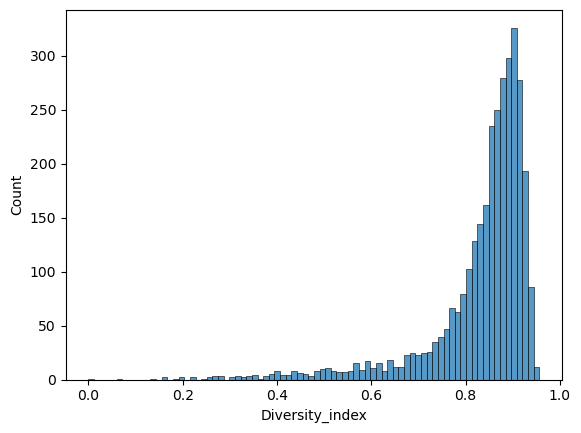

In [40]:
#Original data
sns.histplot(diversity_target)

<Axes: ylabel='Count'>

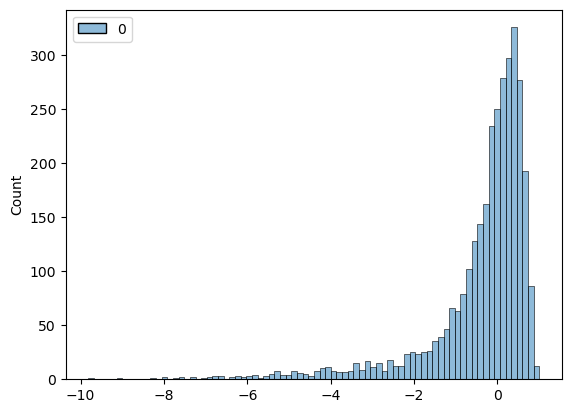

In [41]:
#after robust transform, the distribution look the same as the original
sns.histplot(scaled_labels_rob)

<Axes: ylabel='Count'>

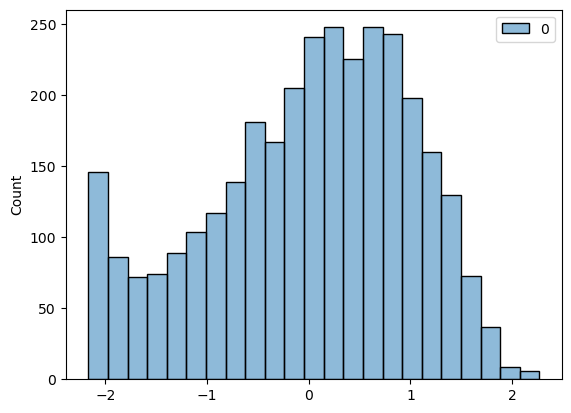

In [42]:
#After PowerTransform
sns.histplot(scaled_labels_pt)

<Axes: xlabel='Diversity_index', ylabel='Count'>

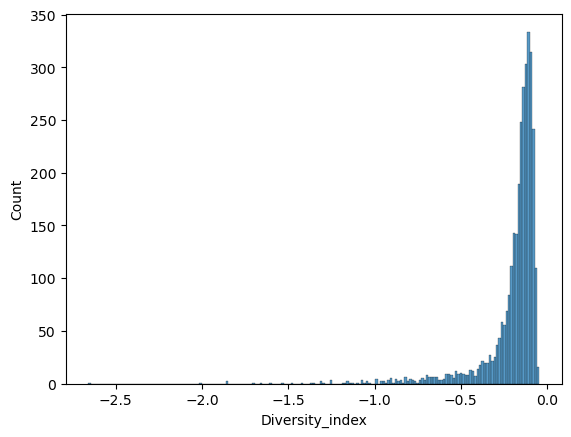

In [43]:
#After log transformation
sns.histplot(log_labels)

<Axes: ylabel='Count'>

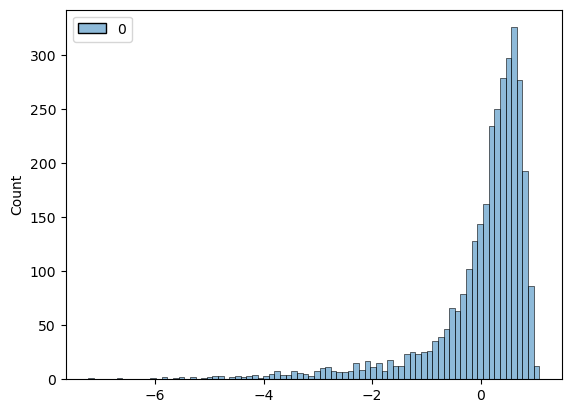

In [44]:
#standard scale
sns.histplot(scaled_labels_std)

Try to make a pipeline to transform the data with:
- for numerical column a powertransformed at first test
- for categorical a OneHotEncode

In [45]:
#pipeline for the numerical cols
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    PowerTransformer()
)

In [46]:
#pipeline for the categorical cols
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

In [47]:
#Transform the data for the models
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)



In [48]:
diversity_processed = preprocessing.fit_transform(diversity_predictors)
diversity_processed.shape

(3199, 72)

In [49]:
preprocessing.get_feature_names_out()

array(['pipeline-1__MaxLengthTL', 'pipeline-1__MaxLengthSL',
       'pipeline-1__MaxJuvLength', 'pipeline-1__AspectRatio_Q',
       'pipeline-1__Depth_max', 'pipeline-1__Nocturnal',
       'pipeline-1__Fished', 'pipeline-1__Relief', 'pipeline-1__Coral',
       'pipeline-1__Depth', 'pipeline-1__Coral_cover',
       'pipeline-1__Reef_complexity', 'pipeline-1__SST',
       'pipeline-1__NPP', 'pipeline-1__Wave_exposure',
       'pipeline-1__Depth_Sbrocco', 'pipeline-1__Deepwater',
       'pipeline-1__Marina_slips_10km', 'pipeline-1__Tourist_fishing',
       'pipeline-1__Artificial_reefs_1km', 'pipeline-1__SG_permits_50km',
       'pipeline-1__Total_gravity', 'pipeline-1__Nursery_seagrass',
       'pipeline-1__Nursery_mangroves', 'pipeline-1__connectivity',
       'pipeline-1__Total', 'pipeline-1__Nb_dif_Sp',
       'pipeline-1__Margalef_Index', 'pipeline-2__Diel_activity_both',
       'pipeline-2__Diel_activity_day', 'pipeline-2__shoaling_schooling',
       'pipeline-2__shoaling_shoaling',

In [50]:
#Make the X and Y test dataset
X_test = test_set.drop("Diversity_index", axis=1)
y_test = test_set['Diversity_index'].copy()

The data are processing, now test a linear regression models

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76E80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76340>)])),
                ('linearregression', LinearRegression())])

In [52]:
predictions = lin_reg.predict(X_test)

In [53]:
predictions[:5]

array([0.79614258, 0.75695801, 0.94177246, 0.84533691, 0.78662109])

In [54]:
y_test.iloc[:5].values

array([0.84245262, 0.85876714, 0.89473684, 0.8463765 , 0.69783058])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model
mae_train = mean_absolute_error(y_test, predictions)
mse_train = mean_squared_error(y_test, predictions)
r_squared_train = r2_score(y_test, predictions)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_train)
print('Mean Squared Error (MSE):', mse_train)
print('R-squared (R²):', r_squared_train)
print('Root Mean Squared Error (RMSE):', rmse_train)

Mean Absolute Error (MAE): 0.06446562745804688
Mean Squared Error (MSE): 0.008720362978263629
R-squared (R²): 0.3230755038317734
Root Mean Squared Error (RMSE): 0.09338288375427067


In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

Ridge_reg = make_pipeline(preprocessing,
                           Ridge(alpha=2, solver='auto', random_state=19))
Ridge_rmse =  -cross_val_score(Ridge_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)

In [57]:
pd.Series(Ridge_rmse).describe()

count    5.000000
mean     0.090973
std      0.005489
min      0.085619
25%      0.086461
50%      0.090268
75%      0.093509
max      0.099007
dtype: float64

In [58]:
#Model fitting with the train data
Ridge_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76E80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76340>)])),
                ('ridge', Ridge(alpha=2, random_state=19))])

In [59]:
#Model test
Ridge_pred = Ridge_reg.predict(X_test)

In [60]:
#Model performance
mae_test_ridge = mean_absolute_error(y_test, Ridge_pred)
mse_test_ridge = mean_squared_error(y_test, Ridge_pred)
r_squared_test_ridge = r2_score(y_test, Ridge_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)

# Print the evaluation metrics
print('Linear Regression performance')
print('Mean Absolute Error (MAE):', mae_train)
print('Mean Squared Error (MSE):', mse_train)
print('R-squared (R²):', r_squared_train)
print('Root Mean Squared Error (RMSE):', rmse_train)
print('')
print('Ridge regression')
print('Mean Absolute Error (MAE):', mae_test_ridge)
print('Mean Squared Error (MSE):', mse_test_ridge)
print('R-squared (R²):',r_squared_test_ridge)
print('Root Mean Squared Error (RMSE):', rmse_test_ridge)

Linear Regression performance
Mean Absolute Error (MAE): 0.06446562745804688
Mean Squared Error (MSE): 0.008720362978263629
R-squared (R²): 0.3230755038317734
Root Mean Squared Error (RMSE): 0.09338288375427067

Ridge regression
Mean Absolute Error (MAE): 0.06412100642544943
Mean Squared Error (MSE): 0.008604872669548756
R-squared (R²): 0.3320405227460085
Root Mean Squared Error (RMSE): 0.09276245290821473


This first try shows bad performance especially for the decision tree. To enhance the model performance we choose to used the grid search method with a cross validation. Try to fine tune the Ridge model and try another models gradient boosting and RF model

In [61]:
#for the ridge regression
from sklearn.model_selection import GridSearchCV
Ridge_reg = Ridge(random_state=21)

params_ridge = {'alpha':[1, 0.1, 0.01,0],
                "fit_intercept":[True, False],
                "solver":['svd','cholesky','lsqr','sparse_cg','sag','saga']
                }
Ridge_grid = GridSearchCV(Ridge_reg, param_grid=params_ridge, n_jobs=2)
Ridge_grid.fit(diversity_processed, scaled_labels_pt)
print(Ridge_grid.best_score_)
print(Ridge_grid.best_params_)

0.3756343197394683
{'alpha': 1, 'fit_intercept': False, 'solver': 'saga'}


In [62]:
#Model evaluation
Ridge_grid_pipeline = make_pipeline(
    preprocessing, Ridge_grid
)

Ridge_grid_pipeline.fit(diversity_predictors, diversity_target)
ridge_pred_grid = Ridge_grid_pipeline.predict(X_test)


In [63]:
#Model performance of ridge regression after grid search
mae_testgrid_ridge = mean_absolute_error(y_test, ridge_pred_grid)
mse_testgrid_ridge = mean_squared_error(y_test, ridge_pred_grid)
r_squared_testgrid_ridge = r2_score(y_test, ridge_pred_grid)
rmse_testgrid_ridge = np.sqrt(mse_testgrid_ridge)

# Print the evaluation metrics
print('Ridge regression, without grid search')
print('Mean Absolute Error (MAE):', mae_test_ridge)
print('Mean Squared Error (MSE):', mse_test_ridge)
print('R-squared (R²):',r_squared_test_ridge)
print('Root Mean Squared Error (RMSE):', rmse_test_ridge)
print('')
print('Ridge regression, with grid search')
print('Mean Absolute Error (MAE):', mae_testgrid_ridge)
print('Mean Squared Error (MSE):', mse_testgrid_ridge)
print('R-squared (R²):',r_squared_testgrid_ridge)
print('Root Mean Squared Error (RMSE):', rmse_testgrid_ridge)

Ridge regression, without grid search
Mean Absolute Error (MAE): 0.06412100642544943
Mean Squared Error (MSE): 0.008604872669548756
R-squared (R²): 0.3320405227460085
Root Mean Squared Error (RMSE): 0.09276245290821473

Ridge regression, with grid search
Mean Absolute Error (MAE): 0.0641520902450149
Mean Squared Error (MSE): 0.008609837224776852
R-squared (R²): 0.33165514554842435
Root Mean Squared Error (RMSE): 0.09278920855776739


For the ridge regression with or without grid search this not enhance the model performance. Test of other models Random Forest and XGBoost.

In [64]:
#try random forest with grid search cv
from sklearn.ensemble import RandomForestRegressor
param_grid =[
    {
        'n_estimators':[100, 50, 200],
        'max_depth':[4,6,8],
        }
        
]

RF_grid_search = GridSearchCV(RandomForestRegressor(random_state=19), param_grid, cv=2, n_jobs=5, verbose=True,
                           scoring='neg_root_mean_squared_error')
RF_grid_search.fit(diversity_processed, scaled_labels_pt.ravel())
print(RF_grid_search.best_score_)
print(RF_grid_search.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
-0.773597128388515
{'max_depth': 8, 'n_estimators': 200}


In [65]:
#pipeline with the RF grid search
RF_grid = make_pipeline(preprocessing, RF_grid_search)

In [66]:
#model training 
RF_grid.fit(diversity_predictors,diversity_target)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76E80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024794C76340>)])),
                ('gridsearchcv',
                 GridSearchCV(cv=2,
                              estimator=RandomForestRegressor(random_state=19),
                              n_jobs=5,
                              param_grid=[{'max_depth': [4, 6, 8],
                                           'n_estimators': [100, 50, 200]}],
                              scoring='neg_root_mean_squared_error',
                              verbose=True))])

In [67]:
#Model testing
RF_pred = RF_grid.predict(X_test)

In [68]:
#evaluation of the random forest
mae_test_RF = mean_absolute_error(y_test, RF_pred)
mse_test_RF = mean_squared_error(y_test, RF_pred)
r_squared_test_RF = r2_score(y_test, RF_pred)
rmse_test_RF = np.sqrt(mse_test_RF)

# Print the evaluation metrics
print('Ridge regression, with grid search')
print('Mean Absolute Error (MAE):', mae_testgrid_ridge)
print('Mean Squared Error (MSE):', mse_testgrid_ridge)
print('R-squared (R²):',r_squared_testgrid_ridge)
print('Root Mean Squared Error (RMSE):', rmse_testgrid_ridge)
print('')
print('Random Forest regression performance, with grid search')
print('Mean Absolute Error (MAE):', mae_test_RF)
print('Mean Squared Error (MSE):', mse_test_RF)
print('R-squared (R²):',r_squared_test_RF)
print('Root Mean Squared Error (RMSE):', rmse_test_RF)

Ridge regression, with grid search
Mean Absolute Error (MAE): 0.0641520902450149
Mean Squared Error (MSE): 0.008609837224776852
R-squared (R²): 0.33165514554842435
Root Mean Squared Error (RMSE): 0.09278920855776739

Random Forest regression performance, with grid search
Mean Absolute Error (MAE): 0.0561948820791015
Mean Squared Error (MSE): 0.00762713020112843
R-squared (R²): 0.4079384904644914
Root Mean Squared Error (RMSE): 0.08733344262725723


In [69]:
#xgboost with grid searchcv

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgb.set_config(verbosity=0)
xgb1 = XGBRegressor(random_state = 19, verbosity=0)

parameters = {
    'nthread':[4],
    'objective':['reg:linear', 'reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'], #the way for regression and its penalty 
    'learning_rate':[0.03, 0.05, 0.07],
    'max_depth':[5,6,7],
    'min_child_weight':[4],
    'silent':[1],
    'subsample':[0.7],
    'n_estimators':[500],
    'eval_metric':['rmse', 'mae', 'rmsle']}

xgb_grid = GridSearchCV(
    xgb1,
    parameters,
    cv =2,
    n_jobs=5,
    verbose=0
)

xgb_grid.fit(diversity_processed, scaled_labels_pt)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.41148588549384996
{'eval_metric': 'rmse', 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:absoluteerror', 'silent': 1, 'subsample': 0.7}


In [70]:
#try the xgboost model
xgb_pipeline =  make_pipeline(preprocessing,
                           xgb_grid)

xgb_train = xgb_pipeline.fit(diversity_predictors, diversity_target)

In [71]:
#model evaluation
xgb_pred = xgb_pipeline.predict(X_test)

In [72]:
#evaluation of the xgboost
mae_test_xgb = mean_absolute_error(y_test, xgb_pred)
mse_test_xgb = mean_squared_error(y_test, xgb_pred)
r_squared_test_xgb = r2_score(y_test, xgb_pred)
rmse_test_xgb = np.sqrt(mse_test_xgb)

# Print the evaluation metrics
# Print the evaluation metrics
print('Ridge regression, with grid search')
print('Mean Absolute Error (MAE):', mae_testgrid_ridge)
print('Mean Squared Error (MSE):', mse_testgrid_ridge)
print('R-squared (R²):',r_squared_testgrid_ridge)
print('Root Mean Squared Error (RMSE):', rmse_testgrid_ridge)
print('')
print('Random Forest regression performance, with grid search')
print('Mean Absolute Error (MAE):', mae_test_RF)
print('Mean Squared Error (MSE):', mse_test_RF)
print('R-squared (R²):',r_squared_test_RF)
print('Root Mean Squared Error (RMSE):', rmse_test_RF)
print('')
print('XGBoost performance')
print('Mean Absolute Error (MAE):', mae_test_xgb)
print('Mean Squared Error (MSE):', mse_test_xgb)
print('R-squared (R²):',r_squared_test_xgb)
print('Root Mean Squared Error (RMSE):', rmse_test_xgb)

Ridge regression, with grid search
Mean Absolute Error (MAE): 0.0641520902450149
Mean Squared Error (MSE): 0.008609837224776852
R-squared (R²): 0.33165514554842435
Root Mean Squared Error (RMSE): 0.09278920855776739

Random Forest regression performance, with grid search
Mean Absolute Error (MAE): 0.0561948820791015
Mean Squared Error (MSE): 0.00762713020112843
R-squared (R²): 0.4079384904644914
Root Mean Squared Error (RMSE): 0.08733344262725723

XGBoost performance
Mean Absolute Error (MAE): 0.05478379146648957
Mean Squared Error (MSE): 0.006612983805682071
R-squared (R²): 0.48666233940168824
Root Mean Squared Error (RMSE): 0.0813202545844642


Beetween this 3 models, the Xgboost has the better performance with an R² at 0.48 and a MSE equal to 0.006. Then we have the random forest and the Ridge.
To see if the trait features enhence the prediction of the diversity index compared to the species features alone, the trait features used previously will be drop from the table and the 3 model will be re-run to compared the performance without them. 

In [73]:
#Drop the categorical feature coming from the trait tables
trait_species2 = trait_species.drop(['MaxLengthTL', 'MaxLengthSL', 'MaxJuvLength', 'AspectRatio_Q',
       'Depth_max', 'Nocturnal', 'Diel_activity', 'shoaling',
       'Position.in.water.column.', 'Fished', 'Spawn', 'Spawning','Diel_activity', 'shoaling',
       'Position.in.water.column.', 'Multihabitat', 'Spawn', 'Spawning', 'Relief','Coral'], axis=1)

In [74]:
trait_species2

,Region,Habitat_type_classLV2,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Depth_Sbrocco,Deepwater,Marina_slips_10km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,HABITAT_CD,Total,Nb_dif_Sp,Margalef_Index,Diversity_index
116,FLA KEYS,Aggregate Reef,9.800000,2.000000,0.550322,23.595392,550.865051,6.992729,-10.0,1182.842773,0,1.649034,0,54,69.0,6.483631e+06,199409.31250,4.618931,ISOL_LR,964.0,32,144.97,0.877755
235,FLA KEYS,Spur and Groove,8.821212,6.181818,1.886364,23.578271,577.431946,6.950751,-6.0,1048.528198,0,1.675894,0,70,74.0,1.150137e+07,21234.26563,9.984375,SPGR_HR,620.0,38,93.19,0.912085
354,FLA KEYS,Pavement,17.399239,7.506345,0.749873,23.551355,595.320252,6.950181,-7.0,1441.421387,0,1.676708,0,70,126.0,1.210275e+07,13956.82617,9.984375,CONT_LR,1068.0,26,160.63,0.882112
474,FLA KEYS,Pavement,9.200000,10.000000,0.400000,23.556451,590.443543,6.959807,-7.0,1341.421387,0,1.696853,0,70,126.0,1.100320e+07,14876.60742,9.984375,ISOL_LR,528.0,19,79.34,0.806049
592,FLA KEYS,Pavement,8.558032,2.870486,0.289415,23.567590,579.874023,6.914992,-14.0,900.000000,16,1.697870,0,70,126.0,9.313051e+06,14697.00195,9.984375,ISOL_LR,740.0,29,111.25,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475402,SEFCRI,Individual or Aggregated Patch Reef,17.953469,1.000000,0.834130,24.261774,453.504700,7.363275,-27.0,200.000000,935,54.825044,0,53,1137.0,3.750273e+06,353222.28130,23.764472,APRD,257.0,26,38.54,0.829341
475523,FLA KEYS,Pavement,7.148084,1.246807,0.498723,23.749170,583.637329,7.319593,-7.0,1900.000000,23,1.779467,0,91,110.0,1.641656e+07,489712.90630,28.308633,CONT_LR,218.0,27,32.67,0.831818
475640,FLA KEYS,Aggregate Reef,2.455478,1.795652,0.535043,24.121240,553.635559,7.216960,-17.0,600.000000,0,43.641268,0,48,559.0,3.953954e+07,18971.01172,40.843137,RUBB_LR,755.0,27,113.51,0.824709
475759,SEFCRI,Aggregate Reef,8.145070,1.000000,0.601972,24.224939,386.825714,7.371410,-6.0,1300.000000,1038,57.419664,0,53,17036.0,4.721569e+04,77573.35156,21.638298,LIRI,208.0,16,31.16,0.857023


In [75]:
#Splitting data into train and test sets
train_set2, test_set2 = train_test_split(trait_species2, test_size=0.2, random_state=21)

#Train set
diversity_predictors2 = train_set2.drop("Diversity_index", axis=1)
diversity_target2 = train_set2["Diversity_index"].copy()

#Test set
X_test2 = test_set2.drop("Diversity_index", axis=1)
y_test2 = test_set2['Diversity_index'].copy()

In [76]:
diversity_processed2 = preprocessing.fit_transform(diversity_predictors2)
diversity_processed2.shape

(3199, 50)

In [77]:
#Ridge model
Ridge_reg2 = Ridge()

params_ridge = {'alpha':[1, 0.1, 0.01,0],
                "fit_intercept":[True, False],
                "solver":['svd','cholesky','lsqr','sparse_cg','sag','saga']
                }
Ridge_grid2 = GridSearchCV(Ridge_reg2, param_grid=params_ridge, n_jobs=2)
Ridge_grid2.fit(diversity_processed2, diversity_target2)
print(Ridge_grid2.best_score_)
print(Ridge_grid2.best_params_)

#Model evaluation
Ridge_grid_pipeline2 = make_pipeline(
    preprocessing, Ridge_grid2
)

Ridge_grid_pipeline2.fit(diversity_predictors2, diversity_target2)
ridge_pred_grid2 = Ridge_grid_pipeline2.predict(X_test2)

0.35271617596009647
{'alpha': 1, 'fit_intercept': True, 'solver': 'lsqr'}


In [78]:
mae_testgrid_ridge2 = mean_absolute_error(y_test2, ridge_pred_grid2)
mse_testgrid_ridge2 = mean_squared_error(y_test2, ridge_pred_grid2)
r_squared_testgrid_ridge2 = r2_score(y_test2, ridge_pred_grid2)
rmse_testgrid_ridge2 = np.sqrt(mse_testgrid_ridge2)

# Print the evaluation metrics
print('Ridge regression, with grid search')
print('Mean Absolute Error (MAE):', mae_testgrid_ridge)
print('Mean Squared Error (MSE):', mse_testgrid_ridge)
print('R-squared (R²):',r_squared_testgrid_ridge)
print('Root Mean Squared Error (RMSE):', rmse_testgrid_ridge)
print('')
print('Ridge regression, second test')
print('Mean Absolute Error (MAE):', mae_testgrid_ridge2)
print('Mean Squared Error (MSE):', mse_testgrid_ridge2)
print('R-squared (R²):',r_squared_testgrid_ridge2)
print('Root Mean Squared Error (RMSE):', rmse_testgrid_ridge2)


Ridge regression, with grid search
Mean Absolute Error (MAE): 0.0641520902450149
Mean Squared Error (MSE): 0.008609837224776852
R-squared (R²): 0.33165514554842435
Root Mean Squared Error (RMSE): 0.09278920855776739

Ridge regression, second test
Mean Absolute Error (MAE): 0.06465645529564906
Mean Squared Error (MSE): 0.008739833389796843
R-squared (R²): 0.3215640990255558
Root Mean Squared Error (RMSE): 0.09348707605758586


In [79]:
#Random Forest
param_grid =[
    {
        'n_estimators':[100, 50, 200],
        'max_depth':[4,6,8],
        }
        
]

RF_grid_search2 = GridSearchCV(RandomForestRegressor(random_state=19), param_grid, cv=2, n_jobs=5, verbose=True,
                           scoring='neg_root_mean_squared_error')
RF_grid_search2.fit(diversity_processed2, diversity_target2.ravel())
print(RF_grid_search2.best_score_)
print(RF_grid_search2.best_params_)

#Model evaluation
RF_grid2 = make_pipeline(preprocessing, RF_grid_search2)
RF_grid2.fit(diversity_predictors2,diversity_target2)
RF_pred2 = RF_grid2.predict(X_test2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
-0.08949343531904627
{'max_depth': 8, 'n_estimators': 200}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [80]:
#Random forest performance
mae_test_RF2 = mean_absolute_error(y_test2, RF_pred2)
mse_test_RF2 = mean_squared_error(y_test2, RF_pred2)
r_squared_test_RF2 = r2_score(y_test2, RF_pred2)
rmse_test_RF2 = np.sqrt(mse_test_RF2)

# Print the evaluation metrics
print('Random Forest regression performance, with grid search')
print('Mean Absolute Error (MAE):', mae_test_RF)
print('Mean Squared Error (MSE):', mse_test_RF)
print('R-squared (R²):',r_squared_test_RF)
print('Root Mean Squared Error (RMSE):', rmse_test_RF)
print('')
print('Random Forest regression performance, second test')
print('Mean Absolute Error (MAE):', mae_test_RF2)
print('Mean Squared Error (MSE):', mse_test_RF2)
print('R-squared (R²):',r_squared_test_RF2)
print('Root Mean Squared Error (RMSE):', rmse_test_RF2)

Random Forest regression performance, with grid search
Mean Absolute Error (MAE): 0.0561948820791015
Mean Squared Error (MSE): 0.00762713020112843
R-squared (R²): 0.4079384904644914
Root Mean Squared Error (RMSE): 0.08733344262725723

Random Forest regression performance, second test
Mean Absolute Error (MAE): 0.05714472585025355
Mean Squared Error (MSE): 0.007836362480287374
R-squared (R²): 0.3916966831561448
Root Mean Squared Error (RMSE): 0.08852323130279065


In [81]:
#XGBoost
parameters = {
    'nthread':[4],
    'objective':['reg:linear', 'reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'], #the way for regression and its penalty 
    'learning_rate':[0.03, 0.05, 0.07],
    'max_depth':[5,6,7],
    'min_child_weight':[4],
    'silent':[1],
    'subsample':[0.7],
    'n_estimators':[500],
    'eval_metric':['rmse', 'mae', 'rmsle']}

xgb_grid2 = GridSearchCV(
    xgb1,
    parameters,
    cv =2,
    n_jobs=5, 
    verbose=0
)

xgb_grid2.fit(diversity_processed2, diversity_target2)
print(xgb_grid2.best_score_)
print(xgb_grid2.best_params_)

#Model training and evaluation
xgb_pipeline2 =  make_pipeline(preprocessing,
                           xgb_grid2)

xgb_pipeline2.fit(diversity_predictors2, diversity_target2)
xgb_pred2 = xgb_pipeline2.predict(X_test2)


0.44096221689065235
{'eval_metric': 'rmse', 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squaredlogerror', 'silent': 1, 'subsample': 0.7}


In [82]:
#Model performance
#evaluation of the random forest
mae_test_xgb2 = mean_absolute_error(y_test2, xgb_pred2)
mse_test_xgb2 = mean_squared_error(y_test2, xgb_pred2)
r_squared_test_xgb2 = r2_score(y_test2, xgb_pred2)
rmse_test_xgb2 = np.sqrt(mse_test_xgb2)

# Print the evaluation metrics
print('XGBoost performance')
print('Mean Absolute Error (MAE):', mae_test_xgb)
print('Mean Squared Error (MSE):', mse_test_xgb)
print('R-squared (R²):',r_squared_test_xgb)
print('Root Mean Squared Error (RMSE):', rmse_test_xgb)
print('')
print('XGBoost performance, second test')
print('Mean Absolute Error (MAE):', mae_test_xgb2)
print('Mean Squared Error (MSE):',mse_test_xgb2)
print('R-squared (R²):',r_squared_test_xgb2)
print('Root Mean Squared Error (RMSE):', rmse_test_xgb2)

XGBoost performance
Mean Absolute Error (MAE): 0.05478379146648957
Mean Squared Error (MSE): 0.006612983805682071
R-squared (R²): 0.48666233940168824
Root Mean Squared Error (RMSE): 0.0813202545844642

XGBoost performance, second test
Mean Absolute Error (MAE): 0.05573285003932247
Mean Squared Error (MSE): 0.00684762594982
R-squared (R²): 0.46844807290884705
Root Mean Squared Error (RMSE): 0.08275038338171008


After drop the features from the trait table we can see the performance of all the model are decrease especially for the XGBoost (from 0.48 with the trait features to 0.46). This let we think that, the trait feature help to predict the diversity index.

In [83]:
#statistic for the Ridge model sqared error
from scipy import stats

confidence = 0.95

squared_errors = (ridge_pred_grid2 - y_test)**2
np.sqrt(
    stats.t.interval(
        confidence, len(squared_errors)-1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)
    )
)

array([0.08368212, 0.10235707])

In [84]:
#statistic for the Random Forest model sqared error
from scipy import stats

confidence = 0.95

squared_errors = (RF_pred2 - y_test)**2
np.sqrt(
    stats.t.interval(
        confidence, len(squared_errors)-1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)
    )
)

array([0.07810146, 0.09784113])

In [85]:
#statistic for the XGboost model sqared error
from scipy import stats

confidence = 0.95

squared_errors = (xgb_pred2 - y_test)**2
np.sqrt(
    stats.t.interval(
        confidence, len(squared_errors)-1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)
    )
)

array([0.07422436, 0.09047649])

**To conclud,**
The XGBoost give us the better performance with an R² equal to 0.48 with a 95% CI: [0.07,0.08]. In the litterature the model performance to predict the diversity_index obtain r-squarred between 0.3 to 0.4 which is the result we get with this strategy.  

We choose to start with a linear model because it's the most basic and allow us to get a fisrt idea of the models performance. The Ridge regression is used next because its an extension of the linear regression but it contain different kernel allowing us to fine tune it. Perhaps, those models shows the lower performance certainely because they have the lower degree of liberty. Next we test the random forest regression because it has a higher degree of liberty. The grid search allow us to find the better parameters for it especially the number of trees which is sensitive to tune. This model enhance the performance to predict the diversity index. The XGBoost is test at least becaused its an ensemble methods with higher freedom degree. It's the model which give us the better performance. The presence of features from both tables (species and trait) gave the better models compared to the species features alone. This suggest that to predict the diversity index the presence of trait feature help.  
